In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('final_no_pct_2000.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace=True)

In [3]:
df.head()

,Tm,Playoff_Result,Year,Games_Played,W,L,PF,PA,PD,MoV,...,D_EXP,D_3DAtt,D_3DConv,D_3D%,D_4DAtt,D_4DConv,D_4D%,D_RZAtt,D_RZTD,D_RZPct
0,Baltimore Ravens,5,2000,16.0,12,4,333,165,168,10.5,...,431.92,211.0,72.0,0.341,19.0,4.0,0.211,27.0,8.0,0.296
1,New York Giants,4,2000,16.0,12,4,328,246,82,5.1,...,266.17,218.0,78.0,0.358,18.0,2.0,0.111,45.0,22.0,0.489
2,Oakland Raiders,3,2000,16.0,12,4,479,299,180,11.3,...,185.58,205.0,81.0,0.395,14.0,4.0,0.286,47.0,30.0,0.638
3,Minnesota Vikings,3,2000,16.0,11,5,397,371,26,1.6,...,2.03,202.0,92.0,0.455,14.0,4.0,0.286,62.0,32.0,0.516
4,Tennessee Titans,2,2000,16.0,13,3,346,191,155,9.7,...,286.03,221.0,68.0,0.308,12.0,1.0,0.083,30.0,14.0,0.467


In [4]:
df.rename(columns={
    'O_Y/P' : 'O_Y_P',
    'O_NY/A' : 'O_Y_A',
    'O_3D%' : 'O_3D_Pct', 
    'O_Sc%' : 'O_Sc_Pct'}, inplace = True)
df.columns

Index(['Tm', 'Playoff_Result', 'Year', 'Games_Played', 'W', 'L', 'PF', 'PA',
       'PD', 'MoV', 'SoS', 'T_O_Yds', 'O_Ply', 'O_Y_P', 'O_TO', 'O_FL',
       'O_1stD', 'O_Cmp', 'OP_Att', 'OP_Yds', 'OP_TD', 'O_Int', 'O_Y_A',
       'OR_Att', 'OR_Yds', 'OR_TD', 'O_Y/A', 'OPen', 'OPen_Yds', 'OPen_FD',
       'O_Sc_Pct', 'O_TO%', 'O_EXP', 'O_3DAtt', 'O_3DConv', 'O_3D_Pct',
       'O_4DAtt', 'O_4DConv', 'O_4D%', 'O_RZAtt', 'O_RZTD', 'O_RZPct',
       'T_D_Yds', 'D_Ply', 'D_Y/P', 'D_TO', 'D_FL', 'D_1stD', 'D_Cmp',
       'DP_Att', 'DP_Yds', 'DP_TD', 'D_Int', 'D_NY/A', 'DR_Att', 'DR_Yds',
       'DR_TD', 'D_Y/A', 'DPen', 'DPen_Yds', 'DPen_FD', 'D_Sc%', 'D_TO%',
       'D_EXP', 'D_3DAtt', 'D_3DConv', 'D_3D%', 'D_4DAtt', 'D_4DConv', 'D_4D%',
       'D_RZAtt', 'D_RZTD', 'D_RZPct'],
      dtype='object')

In [5]:
#All offensive stats
o = df.iloc[:,np.r_[1,2,11:42]]
o.head()

,Playoff_Result,Year,T_O_Yds,O_Ply,O_Y_P,O_TO,O_FL,O_1stD,O_Cmp,OP_Att,...,O_EXP,O_3DAtt,O_3DConv,O_3D_Pct,O_4DAtt,O_4DConv,O_4D%,O_RZAtt,O_RZTD,O_RZPct
0,5,2000,5014.0,1058.0,4.7,26.0,7.0,288.0,287.0,504.0,...,-226.08,236.0,95.0,0.403,6.0,1.0,0.167,50.0,20.0,0.400
1,4,2000,5376.0,1064.0,5.1,24.0,11.0,310.0,311.0,529.0,...,-107.30,229.0,92.0,0.402,15.0,7.0,0.467,46.0,25.0,0.543
2,3,2000,5776.0,1023.0,5.6,20.0,9.0,337.0,284.0,475.0,...,11.03,206.0,89.0,0.432,8.0,3.0,0.375,65.0,38.0,0.585
3,3,2000,5961.0,958.0,6.2,28.0,10.0,319.0,307.0,495.0,...,-60.12,188.0,86.0,0.457,13.0,8.0,0.615,46.0,25.0,0.543
4,2,2000,5350.0,1036.0,5.2,30.0,14.0,299.0,286.0,462.0,...,-203.66,228.0,97.0,0.425,11.0,4.0,0.364,55.0,26.0,0.473


In [6]:
#Other
other = df.iloc[:,np.r_[1,2,4:11]]
other.head()

,Playoff_Result,Year,W,L,PF,PA,PD,MoV,SoS
0,5,2000,12,4,333,165,168,10.5,-2.5
1,4,2000,12,4,328,246,82,5.1,-2.7
2,3,2000,12,4,479,299,180,11.3,-1.5
3,3,2000,11,5,397,371,26,1.6,0.3
4,2,2000,13,3,346,191,155,9.7,-1.3


### Trrying to find best cutoff year for offensive/general stats

In [7]:
#avergae stat of each playoff team
b = other.groupby(['Playoff_Result', 'Year']).mean()
b.shape

(115, 7)

In [8]:
#Average stats by SB Winner
sb_win = b[92:]
sb_win

W    L     PF     PA     PD   MoV  SoS
Playoff_Result Year                                           
5              2000  12.0  4.0  333.0  165.0  168.0  10.5 -2.5
               2001  11.0  5.0  371.0  272.0   99.0   6.2 -1.9
               2002  12.0  4.0  346.0  196.0  150.0   9.4 -0.6
               2003  14.0  2.0  348.0  238.0  110.0   6.9  0.1
               2004  14.0  2.0  437.0  260.0  177.0  11.1  1.8
               2005  11.0  5.0  389.0  258.0  131.0   8.2 -0.4
               2006  12.0  4.0  427.0  360.0   67.0   4.2  1.7
               2007  10.0  6.0  373.0  351.0   22.0   1.4  1.9
               2008  12.0  4.0  347.0  223.0  124.0   7.8  2.0
               2009  13.0  3.0  510.0  341.0  169.0  10.6  0.2
               2010  10.0  6.0  388.0  240.0  148.0   9.3  1.7
               2011   9.0  7.0  394.0  400.0   -6.0  -0.4  2.0
               2012  10.0  6.0  398.0  344.0   54.0   3.4 -0.5
               2013  13.0  3.0  417.0  231.0  186.0  11.6  1.4
               2014  12.0  4.0  468.0  313.0  155.0   9.7  1.3
               2015  12.0  4.0  355.0  296.0   59.0   3.7  2.1
               2016  14.0  2.0  441.0  250.0  191.0  11.9 -2.7
               2017  13.0  3.0  457.0  295.0  162.0  10.1 -0.7
               2018  11.0  5.0  436.0  325.0  111.0   6.9 -1.8
               2019  12.0  4.0  451.0  308.0  143.0   8.9  0.2
               2020  11.0  5.0  492.0  355.0  137.0   8.6  0.8
               2021  12.0  5.0  460.0  372.0   88.0   5.2  0.1
               2022  14.0  3.0  496.0  369.0  127.0   7.5 -1.2

In [9]:
sb_win.reset_index('Year', inplace=True)

<AxesSubplot:xlabel='Year', ylabel='SoS'>

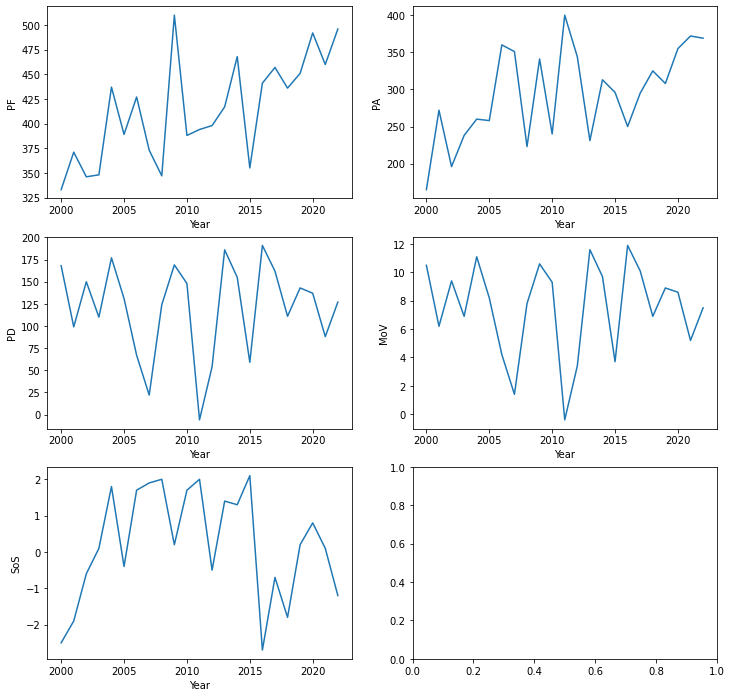

In [10]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

sns.lineplot(ax= axes[0,0], x='Year',y = 'PF', data = sb_win)
sns.lineplot(ax= axes[0,1], x='Year',y = 'PA',data = sb_win)
sns.lineplot(ax= axes[1,0], x='Year',y = 'PD', data = sb_win)
sns.lineplot(ax= axes[1,1], x='Year',y = 'MoV', data = sb_win)
sns.lineplot(ax= axes[2,0], x='Year',y = 'SoS', data = sb_win)

<AxesSubplot:xlabel='SoS'>

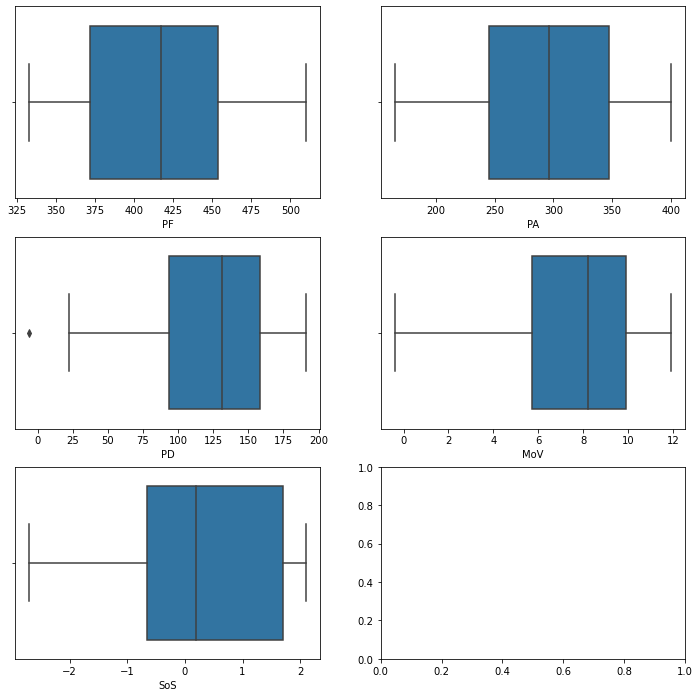

In [11]:
fig, axes = plt.subplots(3,2, figsize=(12,12))

sns.boxplot(ax= axes[0,0], x='PF', data = sb_win)
sns.boxplot(ax= axes[0,1], x='PA', data = sb_win)
sns.boxplot(ax= axes[1,0], x='PD', data = sb_win)
sns.boxplot(ax= axes[1,1], x='MoV', data = sb_win)
sns.boxplot(ax= axes[2,0], x='SoS', data = sb_win)

* Initial Comments:

The outlier on PD --> Dont like it, as well as SoS

In [12]:
min(sb_win['PD'])
sb_win.loc[sb_win['PD'] == min(sb_win['PD'])]
#This is in 2011, maybe do after to get rid;

,Year,W,L,PF,PA,PD,MoV,SoS
Playoff_Result,,,,,,,,
5,2011,9.0,7.0,394.0,400.0,-6.0,-0.4,2.0


In [13]:
#Lets do the stats we deemed significant now, find outliers
sig_vars = df.iloc[:,np.r_[0,1,2,4,5,6,8,9,11,13,16,19,22,25,30,32,35]]

In [14]:
avg_sig = sig_vars.groupby(['Playoff_Result','Year']).mean()
avg_sig.reset_index('Year', inplace= True)
avg_sig.head()
avg_sig = avg_sig[92:]

<AxesSubplot:xlabel='Year', ylabel='O_EXP'>

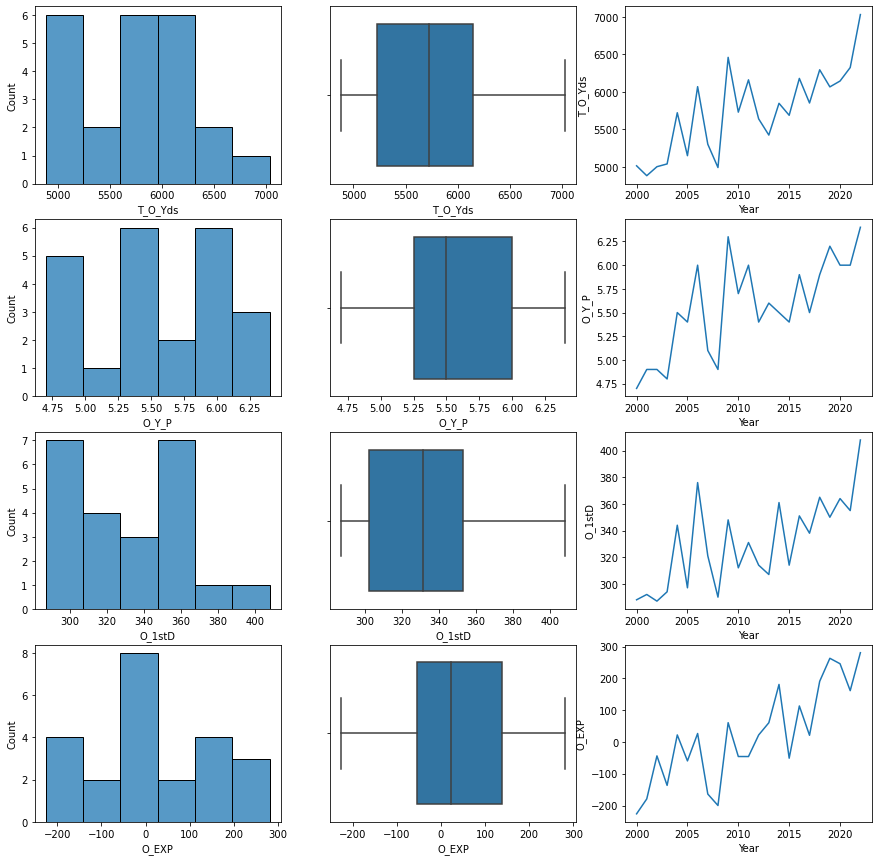

In [15]:
#Already did some of the columns; Lets continue further
fig, axes = plt.subplots(4,3, figsize=(15,15))
sns.histplot(ax= axes[0,0], x='T_O_Yds', data = avg_sig)
sns.histplot(ax= axes[1,0], x='O_Y_P', data = avg_sig)
sns.histplot(ax= axes[2,0], x='O_1stD', data = avg_sig)
sns.histplot(ax= axes[3,0], x='O_EXP', data = avg_sig)
sns.boxplot(ax= axes[0,1], x='T_O_Yds', data = avg_sig)
sns.boxplot(ax= axes[1,1], x='O_Y_P', data = avg_sig)
sns.boxplot(ax= axes[2,1], x='O_1stD', data = avg_sig)
sns.boxplot(ax= axes[3,1], x='O_EXP', data = avg_sig)

sns.lineplot(ax= axes[0,2], x='Year',y = 'T_O_Yds', data = avg_sig)
sns.lineplot(ax= axes[1,2], x='Year', y='O_Y_P', data = avg_sig)
sns.lineplot(ax= axes[2,2], x='Year', y='O_1stD', data = avg_sig)
sns.lineplot(ax= axes[3,2], x='Year',y ='O_EXP', data = avg_sig)

<AxesSubplot:xlabel='Year', ylabel='O_Sc_Pct'>

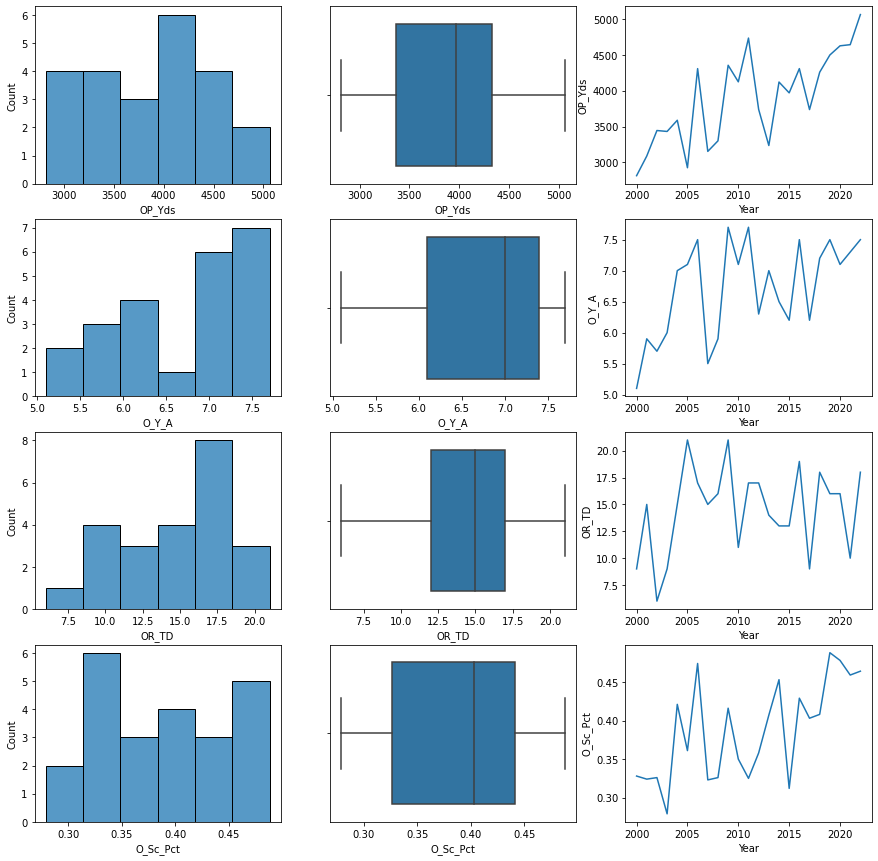

In [16]:
#Other Offensive Stats

fig, axes = plt.subplots(4,3, figsize=(15,15))

sns.histplot(ax= axes[0,0], x='OP_Yds', data = avg_sig)
sns.histplot(ax= axes[1,0], x='O_Y_A', data = avg_sig)
sns.histplot(ax= axes[2,0], x='OR_TD', data = avg_sig)
sns.histplot(ax= axes[3,0], x='O_Sc_Pct', data = avg_sig)
sns.boxplot(ax= axes[0,1], x='OP_Yds', data = avg_sig)
sns.boxplot(ax= axes[1,1], x='O_Y_A', data = avg_sig)
sns.boxplot(ax= axes[2,1], x='OR_TD', data = avg_sig)
sns.boxplot(ax= axes[3,1], x='O_Sc_Pct', data = avg_sig)

sns.lineplot(ax= axes[0,2], x='Year',y= 'OP_Yds', data = avg_sig)
sns.lineplot(ax= axes[1,2], x='Year', y='O_Y_A', data = avg_sig)
sns.lineplot(ax= axes[2,2], x='Year', y='OR_TD', data = avg_sig)
sns.lineplot(ax= axes[3,2], x='Year',y ='O_Sc_Pct', data = avg_sig)

In [17]:
n = min(avg_sig['OR_TD'])
avg_sig.loc[avg_sig['OR_TD'] == n]

,Year,W,L,PF,PD,MoV,T_O_Yds,O_Y_P,O_1stD,OP_Yds,O_Y_A,OR_TD,O_Sc_Pct,O_EXP,O_3D_Pct
Playoff_Result,,,,,,,,,,,,,,,
5,2002,12.0,4.0,346.0,150.0,9.4,5002.0,4.9,287.0,3445.0,5.7,6.0,0.326,-43.76,0.356


In [18]:
n = min(avg_sig['O_Y_A'])
avg_sig.loc[avg_sig['O_Y_A'] == n]

,Year,W,L,PF,PD,MoV,T_O_Yds,O_Y_P,O_1stD,OP_Yds,O_Y_A,OR_TD,O_Sc_Pct,O_EXP,O_3D_Pct
Playoff_Result,,,,,,,,,,,,,,,
5,2000,12.0,4.0,333.0,168.0,10.5,5014.0,4.7,288.0,2815.0,5.1,9.0,0.328,-226.08,0.403


In [19]:
avg_sig[['Year','O_Sc_Pct']].sort_values(by = 'O_Sc_Pct',ascending = True).head()

,Year,O_Sc_Pct
Playoff_Result,,
5,2003,0.279
5,2015,0.312
5,2007,0.323
5,2001,0.324
5,2011,0.325


In [20]:
avg_sig[['Year','O_Y_P']].sort_values(by = 'O_Y_P', ascending = True).head()

,Year,O_Y_P
Playoff_Result,,
5,2000,4.7
5,2003,4.8
5,2008,4.9
5,2001,4.9
5,2002,4.9


<AxesSubplot:xlabel='Year', ylabel='O_3D_Pct'>

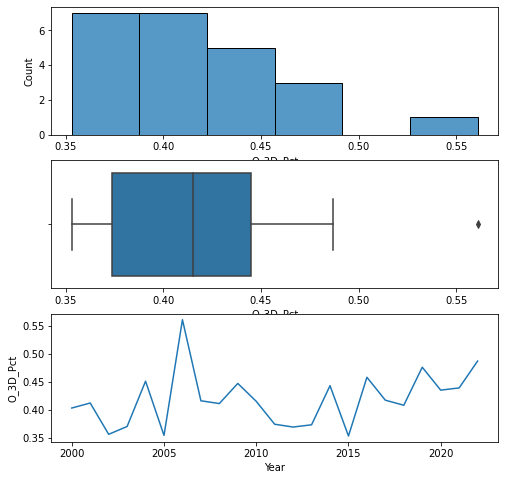

In [21]:
fig, axes = plt.subplots(3,1, figsize=(8,8))
sns.histplot(ax= axes[0], x='O_3D_Pct', data = avg_sig)
sns.boxplot(ax= axes[1], x='O_3D_Pct', data = avg_sig)
sns.lineplot(ax=axes[2], x='Year', y='O_3D_Pct', data = avg_sig)

In [22]:
avg_sig[['Year','O_3D_Pct']].sort_values(by = 'O_3D_Pct',ascending = False)

,Year,O_3D_Pct
Playoff_Result,,
5,2006,0.561
5,2022,0.487
5,2019,0.476
5,2016,0.458
5,2004,0.451
5,2009,0.447
5,2014,0.443
5,2021,0.439
5,2020,0.435


### Conclusion on dates that may be sig different from the rest

2002, 2000, 2003, 2006

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('SoS ~ C(Playoff_Result)', data=other).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Playoff_Result),17.087548,4.0,1.958013,0.101132
Residual,604.343693,277.0,NaN,NaN
